In [ ]:
## Loan Default Prediction Using XGBoost (Scikit-learn + PySaprk)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import joblib


In [2]:
!pip install xgboost onnxmltools onnx scikit-learn skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.5/352.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 25.0 MB/s eta 0:00:00


In [3]:
# For ONNX Conversion
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

In [4]:
#Load and Preprocess Data
df = pd.read_csv('/content/Loan_default_Selected_8_features.csv')
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,DTIRatio,LoanTerm,Default
0,56,85994.0,50587.0,520.0,80.0,15.23,0.44,36.0,0.0
1,69,50432.0,124440.0,458.0,15.0,4.81,0.68,60.0,0.0
2,46,84208.0,129188.0,451.0,26.0,21.17,0.31,24.0,1.0
3,32,31713.0,44799.0,743.0,0.0,7.07,0.23,24.0,0.0
4,60,20437.0,9139.0,633.0,8.0,6.51,0.73,48.0,0.0


In [5]:
df = df.dropna()

EDA (Exploratory Data Analysis)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 54472 entries, 0 to 54471
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             54472 non-null  int64  
 1   Income          54472 non-null  float64
 2   LoanAmount      54472 non-null  float64
 3   CreditScore     54472 non-null  float64
 4   MonthsEmployed  54472 non-null  float64
 5   InterestRate    54472 non-null  float64
 6   DTIRatio        54472 non-null  float64
 7   LoanTerm        54472 non-null  float64
 8   Default         54472 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 4.2 MB
None


In [8]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Age         Income     LoanAmount   CreditScore  \
count  54472.000000   54472.000000   54472.000000  54472.000000   
mean      43.507765   82483.560692  127602.835273    574.499192   
std       14.987712   38934.057072   70713.784748    158.737920   
min       18.000000   15000.000000    5005.000000    300.000000   
25%       31.000000   48801.500000   66396.750000    437.000000   
50%       43.000000   82460.000000  127588.000000    574.000000   
75%       56.000000  116019.250000  188943.500000    711.000000   
max       69.000000  149997.000000  249999.000000    849.000000   

       MonthsEmployed  InterestRate      DTIRatio      LoanTerm       Default  
count    54472.000000  54472.000000  54472.000000  54472.000000  54472.000000  
mean        59.515256     13.531618      0.502813     36.027537      0.116886  
std         34.615442      6.640096      0.230455     16.936625      0.321287  
min          0.000000      2.000000      0.100000     1

In [9]:
print("\nClass Distribution:")
print(df['Default'].value_counts())



Class Distribution:
Default
0.0    48105
1.0     6367
Name: count, dtype: int64


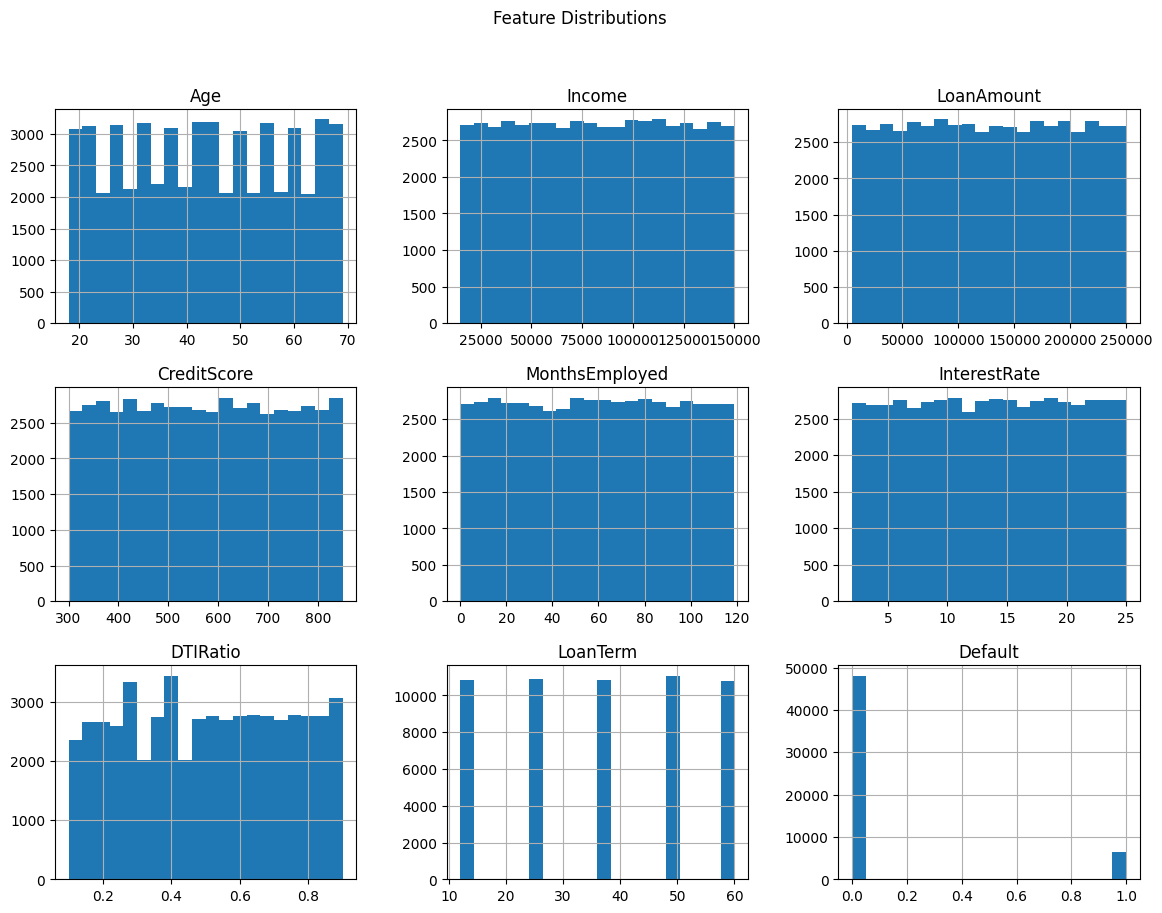

In [10]:
# Distribution of numerical features
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Feature Distributions")
plt.show()

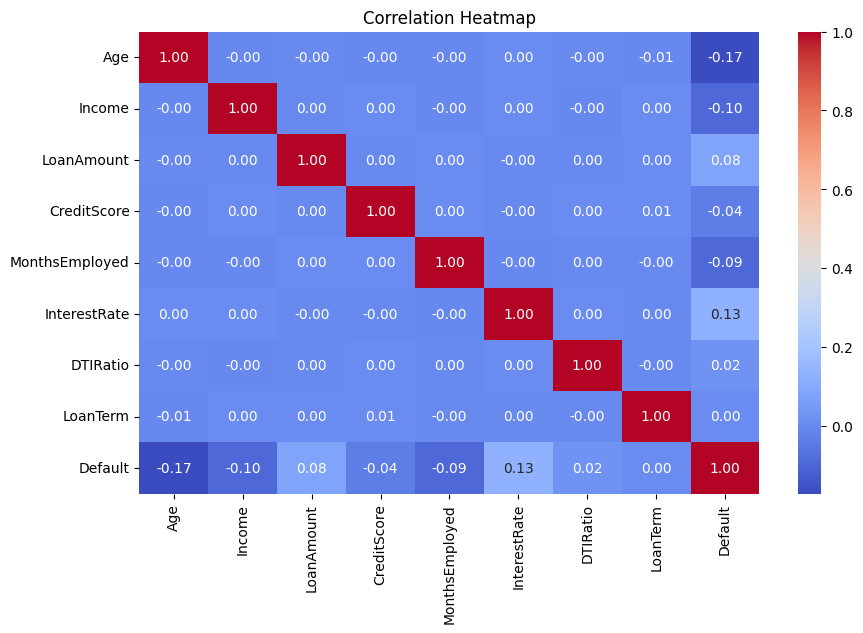

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

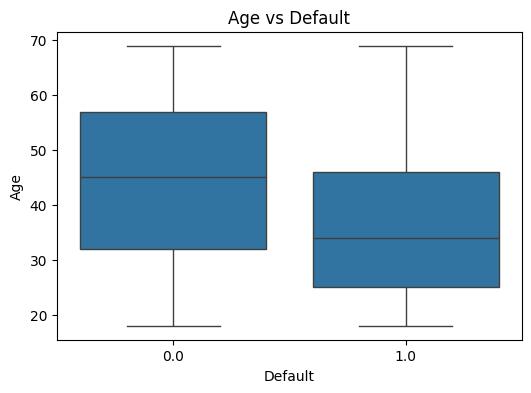

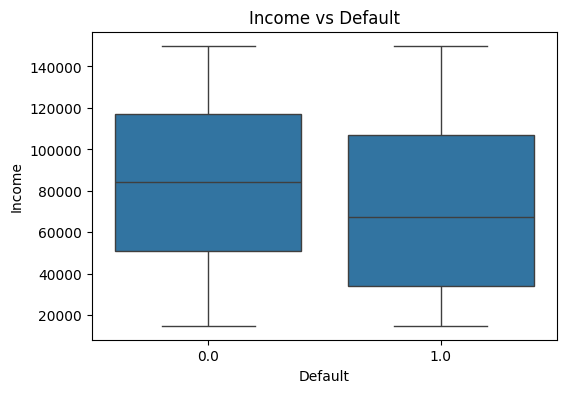

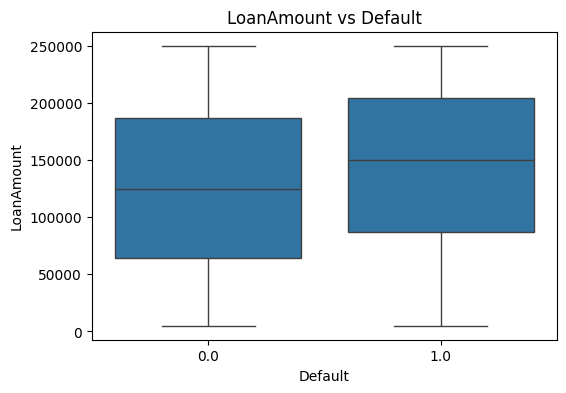

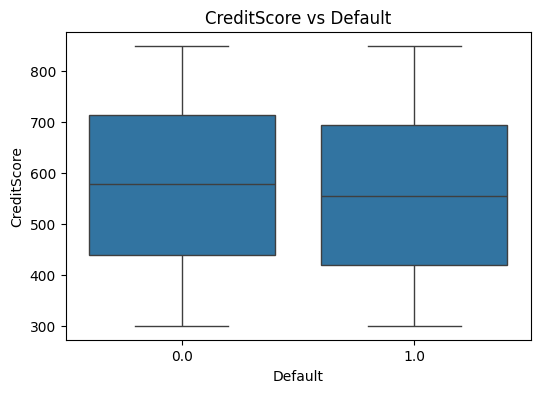

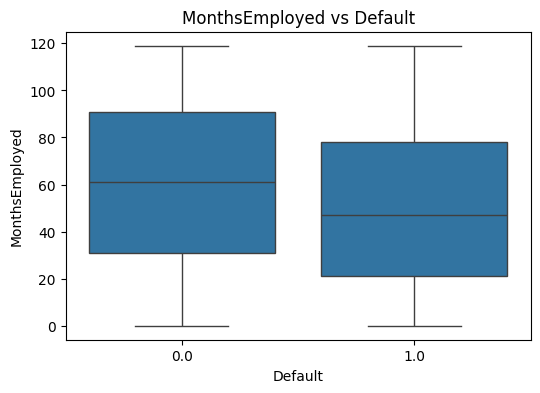

In [12]:
# Default vs Categorical/Continuous features (boxplots)
for col in ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Default", y=col, data=df)
    plt.title(f"{col} vs Default")
    plt.show()

In [13]:
#Feature and Target Selection
feature_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                'MonthsEmployed', 'InterestRate', 'DTIRatio', 'LoanTerm']
target_col = 'Default'

In [14]:
x = df[feature_cols]
y = df[target_col]

In [15]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=8)

In [16]:
# Train XGBClassifier (Scikit-learn)
xgb_model = XGBClassifier(
    #n_estimators=200,
    #learning_rate=0.1,
    #max_depth=3,
    random_state=8,
    #use_label_encoder=False,
    #eval_metric="logloss"
    )

xgb_model.fit(x_train.values, y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
# predictions and Evaluation
y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (Scikit-learn XGB): {accuracy:.2f}")
print("Classifiction Report:")
print(classification_report(y_test, y_pred))

Model Accuracy (Scikit-learn XGB): 0.88
Classifiction Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93     14397
         1.0       0.45      0.08      0.14      1945

    accuracy                           0.88     16342
   macro avg       0.67      0.53      0.54     16342
weighted avg       0.84      0.88      0.84     16342



In [18]:
#Save Model
joblib.dump(xgb_model, "Loan_default_prediction_model.pkl")

['Loan_default_prediction_model.pkl']

In [19]:
import onnxmltools
from onnxmltools.convert.common.data_types import FloatTensorType

#Export Scikit-learn XGB to ONNX
initial_type = [('float_input', FloatTensorType([None, x_train.shape[1]]))]
#onnx_model = convert_sklearn(xgb_model, initial_types=initial_type)
onnx_model = onnxmltools.convert_xgboost(xgb_model, initial_types=initial_type)
onnx.save_model(onnx_model, "Loan_default_prediction_model.onnx")

print("XGB model exported to ONNX successfully.")

XGB model exported to ONNX successfully.


##PySpark XGBClassification (SparkXGB)

In [20]:
!pip install sparkxgb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.4-py2.py3-none-any.whl size=317849769 sha256=d2e5bf06c5d2310b7fc271e9ef61b8ef3eddea373f0d0b0d21a931382d6ccdf4
  Stored in directory: /root/.cache/pip/wheels/8d/28/22/5dbae8a8714ef046cebd320d0ef7c92f5383903cf854c15c0c
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.1
    Uninstalling pyspark-3.5.1:
      Successfully uninstalled pyspark-3.5.1


In [21]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from xgboost.spark import SparkXGBClassifier

In [22]:
#Start Spark Session
spark = SparkSession.builder.appName("Loan_Default_Prediction_XGB").getOrCreate()

In [ ]:
#Load Data into spark
spark_df = spark.createDataFrame(df)

In [ ]:
#Feature Engineering
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
spark_df = assembler.transform(spark_df).select("features", target_col)

In [ ]:
#Train-Test Split
train, test = spark_df.randomSplit([0.7, 0.3], seed=42)

In [ ]:
#Train XGBClassifier (PySpark)
spark_xgb = SparkXGBClassifier(
    features_col="features",
    label_col=target_col,
    num_workers=2,
    max_depth=5,
    eta=0.1,
    num_round=200
)

spark_xgb_model = spark_xgb.fit(train)

INFO:XGBoost-PySpark:Running xgboost-3.0.4 on 2 workers with
	booster params: {'objective': 'binary:logistic', 'device': 'cpu', 'max_depth': 5, 'eta': 0.1, 'num_round': 200, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


In [ ]:
#Prediction and Evaluation
predictions = spark_xgb_model.transform(test)
predictions.select(target_col, "prediction", "probability").show(5, truncate=False)

+-------+----------+----------------------------------------+
|Default|prediction|probability                             |
+-------+----------+----------------------------------------+
|1      |1.0       |[0.21572357416152954,0.7842764258384705]|
|1      |0.0       |[0.6169270277023315,0.38307294249534607]|
|0      |1.0       |[0.29742884635925293,0.7025711536407471]|
|0      |0.0       |[0.9304349422454834,0.06956504285335541]|
|0      |0.0       |[0.7055147886276245,0.2944851815700531] |
+-------+----------+----------------------------------------+
only showing top 5 rows



In [ ]:
#Save Spark Model
spark_xgb_model.save("spark_xgb_model")

In [ ]:
#Export PySpark XGB to ONNX
booster = spark_xgb_model.get_booster()
booster.save_model("spark_xgb_model.json")

In [ ]:
#Convert to ONNX using onnxmltools
import onnxmltools
from onnxmltools.convert.common.data_types import FloatTensorType
import onnx

In [ ]:
initial_type = [('float_input', FloatTensorType([None, len(feature_cols)]))]
onnx_model_spark = onnxmltools.convert_xgboost(booster, initial_types=initial_type)

onnx.save_model(onnx_model_spark, "loan_default_spark_xgb_model.onnx")
print("PySpark XGB model exported to ONNX successfully.")

PySpark XGB model exported to ONNX successfully.


In [ ]:
#Stop Spark Session
spark.stop()